In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Create columns names and import the dataset
Colname=["Age","Op_year","Axil_Nodes","Survival_Status"]
#loading dataset into dataframe
Haber_CSDS=pd.read_csv("C:\\Users\\vmuppidi\\Desktop\\Venkat Reddy\\DataSets\\CancerPatientsds.csv")
# Assigning the calumn names
Haber_CSDS.columns=Colname
#displaying the top 10 rows in dataframe
print(Haber_CSDS.head(10))



   Age  Op_year  Axil_Nodes  Survival_Status
0   30       62           3                1
1   30       65           0                1
2   31       59           2                1
3   31       65           4                1
4   33       58          10                1
5   33       60           0                1
6   34       59           0                2
7   34       66           9                2
8   34       58          30                1
9   34       60           1                1


In [8]:
# Displaying the size/ shape of dataframe
print(Haber_CSDS.shape)

(305, 4)


In [12]:
#Displaying the counts based on the survival status
print(Haber_CSDS["Survival_Status"].value_counts())

1    224
2     81
Name: Survival_Status, dtype: int64


In [13]:
#Displaying all the highlevel information like mean,standard deviation and percentiles
print(Haber_CSDS.describe())

              Age     Op_year  Axil_Nodes  Survival_Status
count  305.000000  305.000000  305.000000       305.000000
mean    52.531148   62.849180    4.036066         1.265574
std     10.744024    3.254078    7.199370         0.442364
min     30.000000   58.000000    0.000000         1.000000
25%     44.000000   60.000000    0.000000         1.000000
50%     52.000000   63.000000    1.000000         1.000000
75%     61.000000   66.000000    4.000000         2.000000
max     83.000000   69.000000   52.000000         2.000000


In [19]:
Haber_Dead= Haber_CSDS.loc[Haber_CSDS["Survival_Status"]==1]
Haber_Survive= Haber_CSDS.loc[Haber_CSDS["Survival_Status"]==2]
print(Haber_Dead.count())
print(Haber_Survive.count())
#By below result we can say that no dulicates values in dataframe

Age                224
Op_year            224
Axil_Nodes         224
Survival_Status    224
dtype: int64
Age                81
Op_year            81
Axil_Nodes         81
Survival_Status    81
dtype: int64


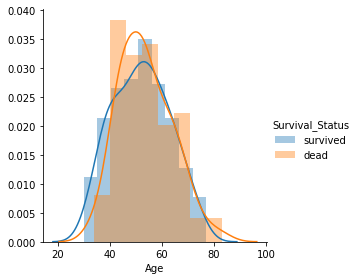

In [23]:
'''observation: survival data column is having numerical values so converting them to catagories like survied=1 and dead=2
so that the data is in meaningfull form'''
Haber_CSDS["Survival_Status"]=Haber_CSDS["Survival_Status"].map({1:'survived', 2:'dead'})
#Based on age and survival ploting the disint plots 
sns.FacetGrid(Haber_CSDS,hue="Survival_Status",size=4).map(sns.distplot,"Age").add_legend()
plt.show()
'''People with age 40 to 60 are having high chances to get cancer.
But by this we cant precidt survival status chances'''

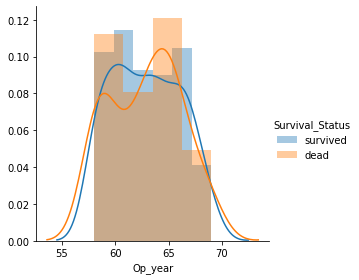

In [24]:
sns.FacetGrid(Haber_CSDS,hue="Survival_Status",size=4).map(sns.distplot,"Op_year").add_legend()
plt.show()
''' From this below plot also we cant say anything exactly about the survival status'''

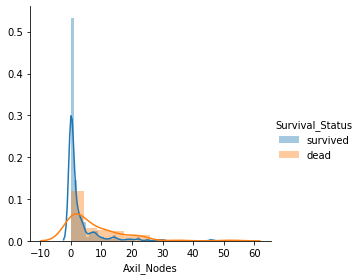

In [25]:
sns.FacetGrid(Haber_CSDS,hue="Survival_Status",size=4).map(sns.distplot,"Axil_Nodes").add_legend()
plt.show()
'''From this we can say that people having zero axil nodes are having high chances of survial.
so axil nodes are usefull features for determing the survival status'''

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


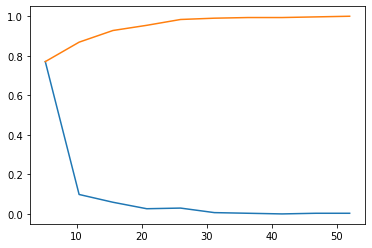

In [36]:
# Compute PDF based on axil nodes
counts, bin_edges = np.histogram(Haber_CSDS['Axil_Nodes'], bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF for the above pdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

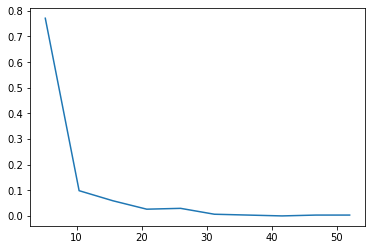

In [40]:
counts, bin_edges = np.histogram(Haber_CSDS['Axil_Nodes'], bins=10)
plt.plot(bin_edges[1:],pdf)
plt.show()

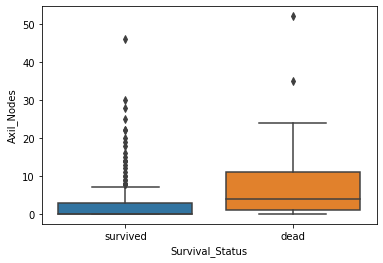

In [41]:
# Ploting the box plot for survival status by taking survival on x axis and axil nodes on y
sns.boxplot(x='Survival_Status', y = 'Axil_Nodes', data=Haber_CSDS)
plt.show()

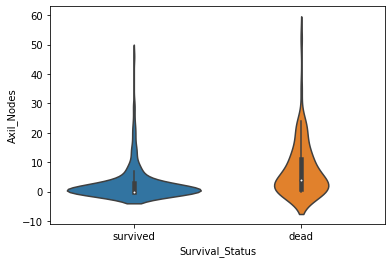

In [42]:
sns.violinplot(x='Survival_Status', y = 'Axil_Nodes', data=Haber_CSDS)
plt.show()

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


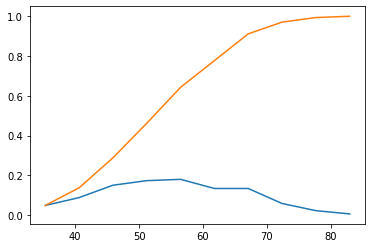

In [43]:
counts, bin_edges = np.histogram(Haber_CSDS['Age'], bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

[0.11803279 0.08852459 0.         0.09180328 0.         0.0852459
 0.         0.07540984 0.         0.09836066 0.09836066 0.
 0.09180328 0.         0.09180328 0.         0.08196721 0.
 0.04262295 0.03606557]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


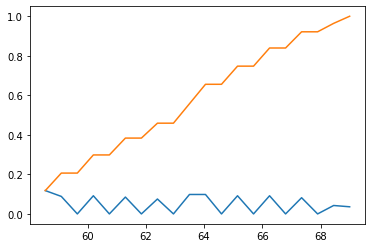

In [45]:
counts, bin_edges = np.histogram(Haber_CSDS['Op_year'], bins=20,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

In [ ]:
'''
observations:
    1) People having the axil nodes between 0-3 have high chances of survival
    2) No insights can be drawn by operation year
    3) Almost 75 % people have axil nodes 0-4 and very less with 52
    4)People with age 40 to 60 are having high chances to get cancer.
    But by this we cant precidt survival status chances
'''